In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

#load image and show it
normal_path = "./Dataset_old/normal/2.jpg"
sedang_path = "./Dataset_old/sedang/1.jpg"
tinggi_path = "./Dataset_old/tinggi/1.jpg"

img_normal = cv2.imread(normal_path)
img_sedang = cv2.imread(sedang_path)
img_tinggi = cv2.imread(tinggi_path)

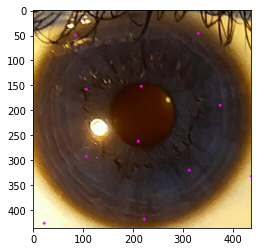

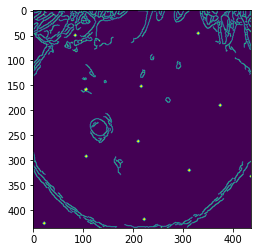

In [2]:
#Hough Transform to detect the iris
input_img = img_normal
real_img = img_normal
preprocessing = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)
preprocessing = cv2.medianBlur(preprocessing, 7)
ret, line = cv2.threshold(preprocessing, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
preprocessing = cv2.Canny(preprocessing, 20, 98, apertureSize=3)
#preprocessing = cv2.Canny(line,0,0)

rows = preprocessing.shape[0]
circles = cv2.HoughCircles(preprocessing, cv2.HOUGH_GRADIENT, 1, rows / 4, param1=ret, param2=10, minRadius=250, maxRadius=real_img.shape[0])

img_center = (int(real_img.shape[0]/2),int(real_img.shape[1] /2))
img_radius = int(real_img.shape[0])

x = []
if circles is not None :
    circles = np.uint16(np.around(circles))
    begin = True
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        
        cv2.circle(preprocessing, center, 1, (255, 0, 255), 3)
        cv2.circle(real_img, center, 1, (255, 0, 255), 3)
        #cv2.circle(preprocessing, center, radius, (255, 0, 255), 3)
        #cv2.circle(real_img, center, radius, (255, 0, 255), 3)
        x.append(center)

plt.imshow(real_img)
plt.show()

plt.imshow(preprocessing)
plt.show()

305
11
11
218.0


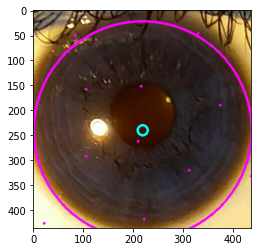

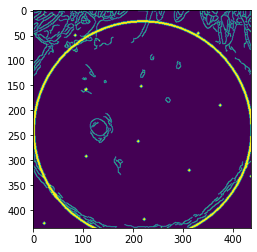

In [3]:
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import KMeans
from scipy import stats

print(radius)
print(len(x))

z = np.abs(stats.zscore(x))
x_o = np.array(x)[(z < 3).all(axis=1)]
print(len(x_o))
print(real_img.shape[0]/2)

clf = KMeans(n_clusters=1, random_state=0).fit(x_o)
cluster_center = (int(clf.cluster_centers_[0][0]) ,int(clf.cluster_centers_[0][1]))

cv2.circle(preprocessing, cluster_center, 10, (0, 255, 255), 3)
cv2.circle(real_img, cluster_center, 10, (0, 255, 255), 3)

cv2.circle(preprocessing, cluster_center, int(real_img.shape[0]/2), (255, 0, 255), 3)
cv2.circle(real_img, cluster_center, int(real_img.shape[0]/2), (255, 0, 255), 3)

plt.imshow(real_img)
plt.show()

plt.imshow(preprocessing)
plt.show()